# Embedding

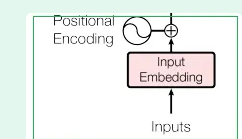

## Word Embedding

In [ ]:
import torch
import torch.nn as nn


class WordEmbedding(nn.Module):
    def __init__(self, vocab_size: int, d_model: int):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, d_model)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        获取输入词汇的embedding

        Args:
            x (torch.Tensor): 输入词汇。x.shape=(batch_size,seq_len)

        Returns:
            输入词汇的embedding。shape=(batch_size,seq_len,d_model)
        """
        return self.embedding(x)


batch_sentences = torch.tensor(
    [
        [101, 3, 2, 5, 7, 8, 102, 0],
        [101, 13, 8, 2, 9, 102, 0, 0],
        [101, 21, 8, 15, 9, 7, 13, 102],
    ]
)

vocab_size = 200
d_model = 6
word_embedding_cls = WordEmbedding(vocab_size=vocab_size, d_model=d_model)
word_embedding = word_embedding_cls(batch_sentences)
word_embedding

tensor([[[ 1.0441,  0.8881,  0.8601,  0.3404, -0.0662,  0.0253],
         [ 0.0484, -0.6636,  1.7338,  0.8148,  0.4544, -1.0431],
         [ 0.9623, -0.2980, -0.2601, -0.4658,  0.6162,  1.3536],
         [-0.3131, -0.2842,  1.5859,  1.3463, -0.3044,  1.2154],
         [-0.7122,  0.4364,  0.9557,  0.2817, -1.3557,  0.4063],
         [-1.3968, -0.0468,  1.4186, -0.4520, -1.5464,  1.2969],
         [-1.5857, -1.3188,  0.1622,  0.2144, -1.5348,  0.8898],
         [ 2.0735,  0.9201, -0.2692, -0.3501,  0.5740, -1.3714]],

        [[ 1.0441,  0.8881,  0.8601,  0.3404, -0.0662,  0.0253],
         [ 0.5270,  0.5284, -0.1764,  0.3905,  0.1528, -0.2726],
         [-1.3968, -0.0468,  1.4186, -0.4520, -1.5464,  1.2969],
         [ 0.9623, -0.2980, -0.2601, -0.4658,  0.6162,  1.3536],
         [-1.0090,  1.7449, -0.7750, -0.2776, -0.3275, -0.7360],
         [-1.5857, -1.3188,  0.1622,  0.2144, -1.5348,  0.8898],
         [ 2.0735,  0.9201, -0.2692, -0.3501,  0.5740, -1.3714],
         [ 2.0735,  0.9

## Positional Embedding

In [ ]:
import torch
import torch.nn as nn
import math


class PositionalEmbedding(nn.Module):
    def __init__(self, max_len: int, d_model: int):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, 1)
        freq = torch.exp(-torch.arange(0, d_model, 2) * math.log(10000.0) / d_model)
        term = torch.outer(position, freq)
        pe[:, 0::2] = torch.sin(term)
        pe[:, 1::2] = torch.cos(term)
        pe = pe.unsqueeze(0)
        self.register_buffer("pe", pe)

    def forward(self, x: torch) -> torch.Tensor:
        """
        获取输入词汇的位置编码

        Args:
            x (torch.Tensor): 输入词汇嵌入编码。x.shape=(batch_size,seq_len,d_model)

        Returns:
            输入词汇编码加入位置编码后的编码。shape=(batch_size,seq_len,d_model)
        """
        return x + self.pe[:, : x.shape[1]]

In [ ]:
batch_sentences = torch.tensor(
    [
        [101, 3, 2, 5, 7, 8, 102, 0],
        [101, 13, 8, 2, 9, 102, 0, 0],
        [101, 21, 8, 15, 9, 7, 13, 102],
    ]
)

max_len = 512
vocab_size = 200
d_model = 6
word_embedding_cls = WordEmbedding(vocab_size=vocab_size, d_model=d_model)
word_embedding = word_embedding_cls(batch_sentences)
positional_embedding_cls = PositionalEmbedding(max_len, d_model)
positional_embedding = positional_embedding_cls(word_embedding)
positional_embedding

tensor([[[-0.4895,  2.0224,  0.1256,  0.2468,  0.9603,  0.1633],
         [ 0.5383, -0.0153, -1.7394,  0.5999, -0.2176,  2.6253],
         [ 0.6448, -2.4575,  0.1297,  2.0142,  0.3538,  1.9979],
         [-1.0599, -1.7332, -0.9198,  3.6886,  0.3467,  0.5871],
         [-0.8170, -0.4961, -2.3759,  1.4874,  0.9827, -0.1997],
         [-0.6883,  0.3148, -0.2839,  0.2361, -0.2783, -0.7248],
         [-2.5828, -0.1106, -0.4562,  0.6592,  0.0090,  1.7933],
         [ 0.6318, -1.1657,  0.3813,  2.0933, -0.3936,  1.0309]],

        [[-0.4895,  2.0224,  0.1256,  0.2468,  0.9603,  0.1633],
         [ 1.9153,  0.2581, -1.4412,  2.0708,  0.1891,  1.6408],
         [ 1.1799, -0.3850, -0.4212,  0.2586, -0.2847, -0.7248],
         [-0.1233, -3.0313,  0.1758,  2.0088,  0.3559,  1.9979],
         [-1.2965,  0.3316,  2.1926,  0.5421,  0.6768, -0.3318],
         [-3.2623, -0.7871, -0.5011,  0.6709,  0.0069,  1.7933],
         [-0.3046, -0.9594,  0.3369,  2.1071, -0.3957,  1.0310],
         [ 0.6318, -1.1

# Mask

## Padding Mask

In [ ]:
import torch
import torch.nn as nn


def padding_mask(x: torch.Tensor, pad_value: int = 0) -> torch.Tensor:
    """x.shape=(batch_size,seq_len)"""
    return x != pad_value


batch_sentences = torch.tensor(
    [
        [101, 3, 2, 5, 7, 8, 102, 0],
        [101, 13, 8, 2, 9, 102, 0, 0],
        [101, 21, 8, 15, 9, 7, 13, 102],
    ]
)


padding_mask(batch_sentences)

tensor([[ True,  True,  True,  True,  True,  True,  True, False],
        [ True,  True,  True,  True,  True,  True, False, False],
        [ True,  True,  True,  True,  True,  True,  True,  True]])

## 前瞻掩码